In [35]:
import numpy as np
import matplotlib.pyplot as plt
from misc_tools.print_latex import print_tex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

# Linearization around fixed point

If system has the following dynamics
$$\dot{ \vec x }  = \vec f(\vec x)$$
where $\vec x \in \R^n$ and $\vec f(\vec x) \in \R^n$,

For example a fake system

$$\begin{bmatrix}
\dot{ \vec x }_1 \\ \dot{ \vec x }_2
\end{bmatrix}=
\begin{bmatrix}
f_1(x_1,x_2) \\ f_2(x_1,x_2)
\end{bmatrix}=
\begin{bmatrix}
x_1 + \sin x_2\\ x_1 \cdot x_2
\end{bmatrix}
$$

## Why do we need linearization?

Linearization will allow us to approximate non-linear system 
$$\dot{ \vec x }  = \vec  f(\vec x)$$
with linear discription
$$\dot{ \vec x }  \approx A \vec x$$
which is only fair for a small region about which system is approximated. 
In particular, we will approximate around "fixed points"

## What is a fixed point?


In example, fixed point is a state $\bar{\vec x}$ at which we dont have any dynamics $\dot{ \vec x} = 0$, thus $\vec f(\bar{\vec x}) = 0$

For given example, mathematically, we see that fixed points should be

$\vec x = (x_1,x_2) \rightarrow (0, k \pi)$ for $k = 0,1,2, \dots$
$$\begin{bmatrix}
\dot{ \vec x }_1 \\ \dot{ \vec x }_2
\end{bmatrix}=
\begin{bmatrix}
x_1 + \sin x_2\\ x_1 \cdot x_2
\end{bmatrix}\overset{\bar x}{\longrightarrow}\begin{bmatrix}
0+\sin k \pi \\ 0 \cdot k\pi
\end{bmatrix}=
\begin{bmatrix}
0 \\ 0 
\end{bmatrix}$$
To be more concise lets drop vector notation
$$\boxed{\vec x \rightarrow x \ ; \ \bar{\vec x} \rightarrow \bar x \ ; \ \vec f (\bar{\vec x}) \rightarrow f(x)}$$

## Linearization

Linearization is a linear approximation of $f(x)$. We get it from multi-variable Taylor series.

$$\boxed{f(x) = f(\bar x) +  \{D f\}(\bar x) (x - \bar x) + \frac{1}{2!} (x - \bar x)^T \{D^2 f\}(\bar x)(x - \bar x) + \dots}$$

Where $D$ is a Jacobian operator, lets use notation $J$ from wiki and my other notes
$$J_{\vec f} (\vec x) = J_{\vec f}(x_1,x_2) = 
\begin{bmatrix}
\\
\frac{\partial f_1}{\partial x_1} &\frac{\partial f_1}{\partial x_2}\\
\\
\frac{\partial f_2}{\partial x_1} &\frac{\partial f_2}{\partial x_2}\\
\\
\end{bmatrix}=
\left[\frac{\partial f_i}{\partial x_j}\right]
$$

We are only interested in linear term
$$f(x) = \cancel{f(\bar x)} + J_f(\bar x) (x - \bar x)$$
where $f(\bar x) = 0$ for a fixed poin. Linearized dynamical system can be expressed as
$$\dot x = f(x) = J_f(\bar x) (x - \bar x)$$
or by changing reference frame to 
$$\tilde x = x - \bar x \rightarrow \dot{\tilde x} = \dot x + 0$$
we get
$$\boxed{\dot{\tilde x} = J_f(\bar x) \tilde x = A \tilde x}$$

## Example with pendulum

### Equation to system

Simplified governing equation of the pendulum is
$$ \ddot \theta = - \sin \theta - \delta \dot \theta$$
with some 'friction' $\delta$.

States of this system are 
$$x = 
\begin{bmatrix}x_1\\ x_2\end{bmatrix}=
\begin{bmatrix}\theta\\ \dot \theta\end{bmatrix}$$

$$ \begin{cases}
\frac{d}{dt} \theta = \dot \theta\\
\frac{d}{dt}\dot \theta = - \sin \theta - \delta \dot \theta

\end{cases}$$
or in terms of $x_1,x_2$
$$ \begin{cases}
\frac{d}{dt} x_1 = x_2\\
\frac{d}{dt}x_2 = - \sin x_1 - \delta x_2
\end{cases}$$

So system $\dot{ \vec x }  = f(\vec x)$ can be written in matrix form as
$$\dot{ \vec x }  = f(\vec x) \rightarrow 
\frac{d}{dt}\begin{bmatrix}x_1\\ x_2\end{bmatrix}
=
\begin{bmatrix}x_2\\  -\sin x_1 - \delta x_2\end{bmatrix}$$

As we see there is no way to express 
$\begin{bmatrix}x_2\\  -\sin x_1 - \delta x_2\end{bmatrix}$ as $A \begin{bmatrix}x_1\\  x_2\end{bmatrix}$, that is why we linearize


### Linearization of a system

Jacobian of $f(x)$ is
$$\vec J_ f(x_1,x_2) = 
\begin{bmatrix}
\frac{\partial x_2}{\partial x_1} &\frac{\partial x_2}{\partial x_2}\\
\frac{\partial (-\sin x_1 - \delta x_2)}{\partial x_1} &\frac{\partial (\sin x_1 - \delta x_2)}{\partial x_2}
\end{bmatrix}=
\begin{bmatrix}
0 & 1\\
-\cos x_1 & -\delta\\
\end{bmatrix}

Our system becomes:
$$\frac{d}{dt}\begin{bmatrix}x_1\\ x_2\end{bmatrix} =  \begin{bmatrix}
0 & 1\\
-\cos x_1 & -\delta\\
\end{bmatrix}
(x - \bar x)$$
where $f(\bar x) = 0$ at our fixed point

### Fixed points

This system is good since we can produce fixed points just from intuition. We expect pendulum to have equilibrium at up and down positions at zero angular velocity:
$$x_1 = \theta = 0 || \pi$$
$$ x_2 = \dot \theta = 0$$
so
$$\bar x = \begin{bmatrix}0\\0\end{bmatrix}, \begin{bmatrix}\pi\\0\end{bmatrix}$$

### Dynamics at fixed points

Plug fixed points into linearized dynamics
$$A = \begin{bmatrix}
0 & 1\\
-\cos x_1 & -\delta\\
\end{bmatrix}$$
We get
$$A_{down} = \begin{bmatrix}
0 & 1\\
-1 & -\delta\\
\end{bmatrix}$$
$$A_{up} = \begin{bmatrix}
0 & 1\\
 1 & -\delta\\
\end{bmatrix}$$

## Determining stability

### Continuous dynamics

Eigenvalues of matrix $A$ can tell whether system is stable or not.

From last chapter we know that solution to (continous) dynamical system will be 
$$\vec x (t) = e^{At}  \ \vec x (0) = T e^{Dt} T^{-1} \ \vec x (0)$$
where diagonal matrix $D$ contains eigenvalues 
$$\lambda = a + i b$$

and entries of $e^{Dt}$ will be
$$e^{\lambda t} = e^{at}\left[ \cos{bt} + i \sin{bt}\right]$$
As we see real part $a$ of $\lambda$ scales eigenvalue with time and imaginary part $b$ "rotates"

Depending on sign of $a$ we can expect initial state $\vec x (0)$ to
* $a= 0$ remain the same (or bounded?), since  $e^{at} \rightarrow 1$
* $a \lt 0$ converge to some state, since $e^{at}$ decays to 0
* $a \gt 0$ "blow up", get unbounded with exponential rate

Thus, we can expect for a system where **all** eigenvalues of A have negative real part to be stable

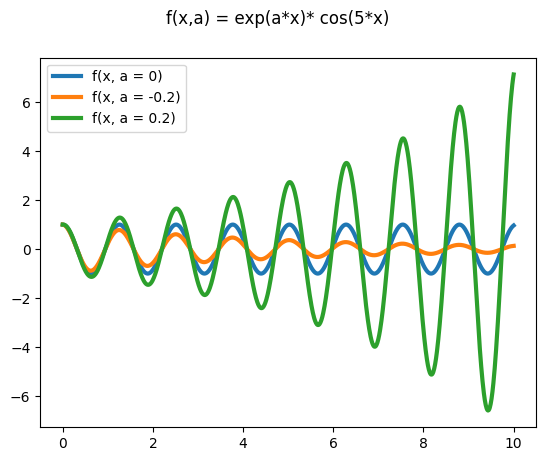

In [34]:
x = np.linspace(0,10, 1000)
aaa = [0,-0.2,0.2]
for a in aaa:
    plt.plot(x, np.exp(a*x)*np.cos(5*x), label=f'f(x, a = {a})', linewidth = 3)
plt.suptitle('f(x,a) = exp(a*x)* cos(5*x) ')
plt.legend()

### Time-discrete systems

Difference is that states take discrete value in time with a time step $\Delta t$:
$$x_k(t_k) = x_k(k \cdot \Delta t)$$

And  $A$ "advances" state from one time step to another:
$$\vec x (t) = e^{At}  \ \vec x (0) \rightarrow x_{k+1} = e^{A\Delta t} x_k$$
and since $e^{A\Delta t} = \tilde A$
then
$$ x_1 = \tilde A x_0$$
$$ x_2 = \tilde A x_1 = \tilde A^2 x_0$$
$$\dots$$
$$ x_n = \tilde A^n x_0$$

in order to check stability, we have to check Spectral radius $\rho(A)$ (see this section in [eigenproblem_notes.ipynb](../Eigenproblem/eigenproblem_notes.ipynb))
***
Custom explanation (not considering complex eigvals, but can be reinterpreted)

The main idea is that state can be expressed as linear combination of eigenvalues of A

$$\vec x_0 = \alpha \vec \xi_1 + \beta \vec \xi_2$$

$$A \vec x_0 = \alpha A \vec \xi_1 + \beta A \vec \xi_2 = \alpha \lambda_1 \vec \xi_1 + \beta \lambda_2 \vec \xi_2$$

and on repeated application of $A$ eigenvectors-basis are only scaled and coefficients either grow or shrink as
$$A^n \vec x_0 = A^{n-1}(A\vec x_0 ) = \alpha \lambda_1^n \vec \xi_1 + \beta \lambda_2^n \vec \xi_2$$
if one of eigenvalues $\lambda_i \gt 1$, state will diverges, system is unstable (in long term)

Therefor stability metric for time-discrete systems is 
$$\rho(A) = \max \{ \lambda_0,\lambda_1,\dots\} \lt 1$$
***

## Stability of pendulum example

We check eigenvalues of our system
$$A_{down} = \begin{bmatrix}
0 & 1\\
-1 & -\delta\\
\end{bmatrix}$$
$$A_{up} = \begin{bmatrix}
0 & 1\\
 1 & -\delta\\
\end{bmatrix}$$
As we see down state has both negative real parts of eignevalues = stable, and
up state is unstable, as it has positive real part

In [41]:
dd = 0.001
Adn = np.array([[0,1],[-1,-dd]])
Aup = np.array([[0,1],[1,-dd]])
print_tex('Re\{\lambda_{i, down}\}= ', np.linalg.eigvals(Adn).real)
print_tex('Re\{\lambda_{i, up}\}= ', np.linalg.eigvals(Aup).real)

<IPython.core.display.Math object>

<IPython.core.display.Math object>